In [2]:
%load_ext autoreload
%autoreload 2
from objectives import *
from pebsi.processing.plotting_fxns import *
import pebsi.processing.gridsearch_processing as gsproc
from seasonal_error import *

In [8]:
# ===== CALIBRATE ON GULKANA =====
gsproc.sitedict['firn'] = ['Z','T']
result_dict = gsproc.get_result_dict(force_redo=True, parse_runs=['firn'])

# ===== NORMALIZE =====
lim_percentile = 75
all_error = ['winter','summer']
error_lims = {}
for err in all_error:
    error_lims[err] = gsproc.get_percentile(result_dict, err, lim_percentile)
result_dict = gsproc.add_normalized(result_dict, error_lims=error_lims, run_type='firn')

# ===== FIND BEST PARAMETERS =====
best_dict = {}
for site in gsproc.sitedict['firn']+['mean']:
    print(f'=========================={site}==========================')
    best_by = gsproc.get_best_normalized(all_error, result_dict, prints=True, site=site)
    best = best_by[-1]
    best_dict[site] = best
    if site != 'mean':
        ds = gsproc.get_any(result_dict, best[0], best[1], site, run_type='firn')
        # fig, ax = plot_seasonal_mass_balance(ds)
        # ax.set_title(ds.glacier.capitalize() + ' '+site,fontsize=12)
        winter_error, summer_error, annual_error = seasonal_mass_balance(ds, 'ME')
        print(f'Winter bias: {winter_error:.2f}    Summer bias: {summer_error:.2f}')
        winter_error, summer_error, annual_error = seasonal_mass_balance(ds, 'MAE')
        print(f'Winter MAE: {winter_error:.2f}    Summer MAE: {summer_error:.2f}')
    else:
        winter_error = result_dict[best[0]][best[1]][site]['winter_ME']
        summer_error = result_dict[best[0]][best[1]][site]['summer_ME']
        print(f'Winter bias: {winter_error:.2f}    Summer bias: {summer_error:.2f}')
        winter_error = result_dict[best[0]][best[1]][site]['winter_MAE']
        summer_error = result_dict[best[0]][best[1]][site]['summer_MAE']
        print(f'Winter MAE: {winter_error:.2f}    Summer MAE: {summer_error:.2f}')
        for site in ['Z','T']:
            ds = gsproc.get_any(result_dict, best[0], best[1], site, run_type='firn')
            fig, ax = plot_seasonal_mass_balance(ds)
            ax.set_title(ds.glacier.capitalize() + ' '+site+' calibrated to the mean of T and Z',fontsize=12)
        best_gulkana = best

FileNotFoundError: [Errno 2] No such file or directory: '/trace/group/rounce/cvwilson/Output/09_08_T_0/'

==========================EC==========================
Weights:
    winter     summer     best
         1          0      ('1.75', '-6.5')
         0          1      ('1.5', '-7')
       0.5        0.5      ('1.75', '-7')
Winter bias: 0.08    Summer bias: 0.13
Winter MAE: 0.37    Summer MAE: 0.32


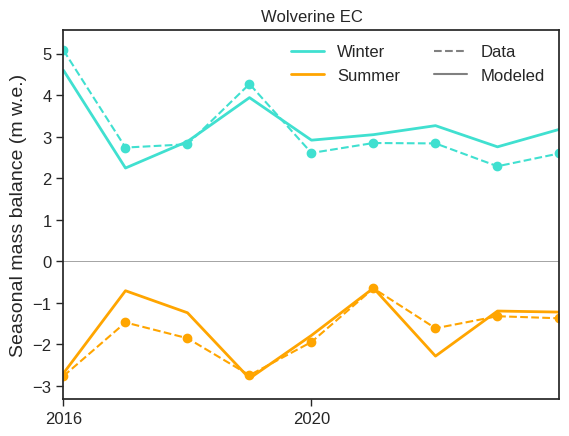

In [ ]:
# ===== CALIBRATE ON WOLVERINE =====
gsproc.sitedict['firn'] = ['EC','Z']
result_dict = gsproc.get_result_dict(force_redo=True, parse_runs=['firn'])

# ===== NORMALIZE =====
lim_percentile = 75
all_error = ['winter','summer']
error_lims = {}
for err in all_error:
    error_lims[err] = gsproc.get_percentile(result_dict, err, lim_percentile)
result_dict = gsproc.add_normalized(result_dict, error_lims=error_lims, run_type='firn')

# ===== FIND BEST PARAMETERS =====
best_dict = {}
for site in ['EC']:
    print(f'=========================={site}==========================')
    best_by = gsproc.get_best_normalized(all_error, result_dict, prints=True, site=site)
    best = best_by[-1]
    best_dict[site] = best
    ds = gsproc.get_any(result_dict, best[0], best[1], site, run_type='firn')
    fig, ax = plot_seasonal_mass_balance(ds)
    ax.set_title(ds.glacier.capitalize() + ' '+site,fontsize=12)
    winter_error, summer_error, annual_error = seasonal_mass_balance(ds, 'ME')
    print(f'Winter bias: {winter_error:.2f}    Summer bias: {summer_error:.2f}')
    winter_error, summer_error, annual_error = seasonal_mass_balance(ds, 'MAE')
    print(f'Winter MAE: {winter_error:.2f}    Summer MAE: {summer_error:.2f}')
best_wolverine = best

==========================KPS==========================
Weights:
    winter     summer     best
         1          0      ('2.75', '-3.5')
         0          1      ('1.25', '-8.5')
       0.5        0.5      ('2', '-6.5')
Winter bias: -0.29    Summer bias: -0.20
Winter MAE: 0.60    Summer MAE: 1.07


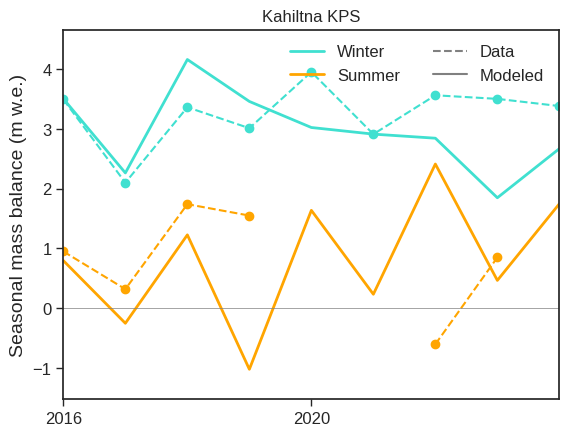

In [6]:
# # ===== CALIBRATE ON KAHILTNA =====
gsproc.sitedict['firn'] = ['KPS']
result_dict = gsproc.get_result_dict(force_redo=True, parse_runs=['firn'])

# ===== NORMALIZE =====
lim_percentile = 75
all_error = ['winter','summer']
error_lims = {}
for err in all_error:
    error_lims[err] = gsproc.get_percentile(result_dict, err, lim_percentile)
result_dict = gsproc.add_normalized(result_dict, error_lims=error_lims, run_type='firn')

# ===== FIND BEST PARAMETERS =====
best_dict = {}
for site in ['KPS']:
    print(f'=========================={site}==========================')
    best_by = gsproc.get_best_normalized(all_error, result_dict, prints=True, site=site)
    best = best_by[-1]
    best_dict[site] = best
    ds = gsproc.get_any(result_dict, best[0], best[1], site, run_type='firn')
    fig, ax = plot_seasonal_mass_balance(ds)
    ax.set_title(ds.glacier.capitalize() + ' '+site,fontsize=12)
    winter_error, summer_error, annual_error = seasonal_mass_balance(ds, 'ME')
    print(f'Winter bias: {winter_error:.2f}    Summer bias: {summer_error:.2f}')
    winter_error, summer_error, annual_error = seasonal_mass_balance(ds, 'MAE')
    print(f'Winter MAE: {winter_error:.2f}    Summer MAE: {summer_error:.2f}')
best_kahiltna = best

In [34]:
gsproc.get_any(result_dict, best[0], best[1], 'KPS', run_type='firn')

<xarray.Dataset> Size: 619MB
Dimensions:         (time: 85465, layer: 80)
Coordinates:
  * time            (time) datetime64[ns] 684kB 2015-08-01 ... 2025-05-01
  * layer           (layer) int64 640B 0 1 2 3 4 5 6 7 ... 73 74 75 76 77 78 79
Data variables: (12/35)
    melt            (time) float64 684kB ...
    refreeze        (time) float64 684kB ...
    runoff          (time) float64 684kB ...
    accum           (time) float64 684kB ...
    cumrefreeze     (time) float64 684kB ...
    dh              (time) float64 684kB ...
    ...              ...
    meltenergy      (time) float64 684kB ...
    albedo          (time) float64 684kB ...
    SWnet           (time) float64 684kB ...
    LWnet           (time) float64 684kB ...
    NetRad          (time) float64 684kB ...
    MB              (time) float64 684kB ...
Attributes: (12/15)
    lapse_rate:       -6.5
    kp:               2
    glacier:          kahiltna
    elevation:        3053.0 m a.s.l.
    site:             KPS
    from_AWS:         none
    ...               ...
    run_start:        2015-08-01
    run_end:          2025-05-01
    model_run_date:   2025-09-08 22:30:18.542357
    time_elapsed:     3278.7 s
    run_by:           trace22.wec.local.cmu.edu
    task_id:          50

In [33]:
# print(f'Gulkana parameters:     kp {best_gulkana[0]}        lapse_rate {best_gulkana[1]}')
# print(f'Wolverine parameters:   kp {best_wolverine[0]}      lapse_rate {best_wolverine[1]}')
print(f'Kahiltna parameters:    kp {best_kahiltna[0]}      lapse_rate {best_kahiltna[1]}')

Kahiltna parameters:    kp 2      lapse_rate -6.5


Use these parameters to perform a long simulation (1980-2025) and create the forcings file below

In [17]:
import xarray as xr
import pandas as pd

# open PEBSI simulation and associated climate (contains rainfall)
site = 'Z'
glacier = 'Gulkana' if site in ['Z','T'] else 'Wolverine'
ds = xr.open_dataset(f'/trace/group/rounce/cvwilson/Output/{glacier}_2025_08_28_long{site}_0.nc')
ds_tp = xr.open_dataset(f'/trace/group/rounce/cvwilson/Output/{glacier}_2025_08_28_long{site}_climate.nc')['tp']
timeres='1d'
forcing_fn = f'/trace/group/rounce/cvwilson/Output/{glacier.lower()}{site}_{timeres}_forcings_wsrho.csv'

# clip datasets to a common time
clip_time = pd.date_range('1980-04-15 00:00','2025-04-20 00:00',freq='h')
ds_tp = ds_tp.sel(time=clip_time)
ds = ds.sel(time=clip_time)

# # changed output so updated runs have vaporsolid mass flux and old runs just have latent heat
# if 'vaporsolid' in ds.variables:
# get sublimation from any negative vaporsolid mass fluxes in m w.e.
ds['vaporsolid'][ds['vaporsolid'] > 0] = 0
ds['sublim'] = ds['vaporsolid']
# else:
#     # get sublimation from latent heat
#     ds['sublim'] = ds.latent*3600/(2849000 * 1000) # latent (J s-1 m-2) * dt (s) / density_water (kg m-3) / lh_sub (J kg-1) --> m w.e.
#     ds['sublim'][ds['sublim'] < 0] = 0
#     ds['sublim'][ds.surftemp.values >= 0] = 0
#     ds['sublim'] *= -1

# get rain from total precipitation - accumulation (mask out any erraneous negatives)
ds['rain'] = ds_tp - ds['accum']
ds['rain'][ds['rain'] < 0] = 0

# change units of surftemp
ds['surftemp'] += 273.15

# get surface density
layer_thickness = ds.layerheight * 100
cumulative_depth = layer_thickness.cumsum(dim="layer")
mask = cumulative_depth <= 50
weighted_density = ds.layerdensity * layer_thickness.where(mask)
valid_thickness = layer_thickness.where(mask).sum(dim="layer")
surfdens = weighted_density.sum(dim="layer") / valid_thickness
ds['surfdens'] = surfdens

# resample to the specified resolution with sum (mass balance terms) and mean (surface temp)
ds_mb = ds[['melt','accum','rain','sublim']].resample(time=timeres).sum()
ds_mb *= 1000   # convert m w.e. to kg m-2
ds_other = ds[['surftemp','surfdens']].resample(time=timeres).mean()

# merge datasets and rename
data_in = xr.merge([ds_mb, ds_other])
data_in = data_in.rename_vars({'melt':'SMELT', 'rain':'RAIN', 'surftemp':'TS', 'accum':'BDOT','sublim':'SUBLIM','surfdens':'RHOS'})

# store data as a .csv
df = data_in[['BDOT','RAIN','TS','SMELT','SUBLIM','RHOS']].to_dataframe()
print(forcing_fn)
df.to_csv(forcing_fn)

/trace/group/rounce/cvwilson/Output/gulkanaZ_1d_forcings_wsrho.csv


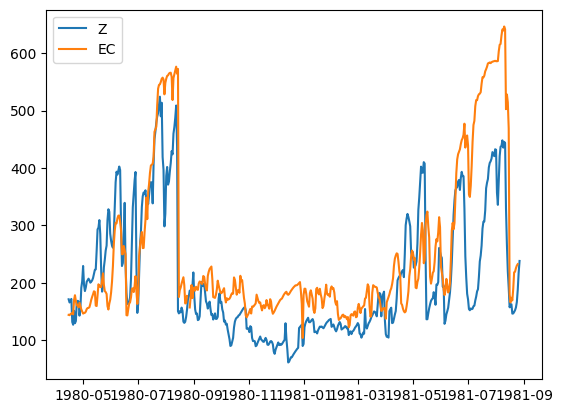

In [23]:
df1 = pd.read_csv('/trace/group/rounce/cvwilson/Output/gulkanaZ_1d_forcings_wsrho.csv')
df2 = pd.read_csv('/trace/group/rounce/cvwilson/Output/wolverineEC_1d_forcings_wsrho.csv')
plt.plot(pd.to_datetime(df1.time.values[:500]), df1.RHOS[:500],label='Z')
plt.plot(pd.to_datetime(df2.time.values[:500]), df2.RHOS[:500],label='EC')
plt.legend()
plt.show()